In [1]:
import json
import os
import pandas as pd
import numpy as np
import prettytable as pt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import dates
import datetime
import warnings
warnings.filterwarnings("ignore")


###################################################################################################
                                                                                                  #
from rhoova.Client import *                                                                       #   
#Register and get api key from https://app.rhoova.com/ for ClientConfig("api key", "api secret")  #
config = ClientConfig("", "")                                                                     #
api = Api(config)                                                                                 # 
                                                                                                  #
###################################################################################################



directory = os.path.normpath(os.getcwd() + os.sep + os.pardir )
datadirectory=directory+"/data/yielddata.csv"


yielddata = pd.read_csv(datadirectory)
yielddata = yielddata.replace(np.nan, '', regex=True) 

mdirectory = os.path.normpath(os.getcwd() + os.sep + os.pardir )
mdatadirectory=mdirectory+"/data/marketdata.csv"

marketdata = pd.read_csv(mdatadirectory)
marketdata = marketdata.replace(np.nan, '', regex=True) 


In [2]:
leg1Definition={}
leg1Definition["type"]="Fixed"
leg1Definition["payOrReceive"]="Receive"
leg1Definition["currency"]="USD"
leg1Definition["notional"]=1000000
leg1Definition["coupon"]=0.00971619
leg1Definition["spread"]= 0.0
leg1Definition["frequency"]="Semiannual"
leg1Definition["dayCounter"]="Thirty360"
leg1Definition["calendar"]="UnitedStates"
leg1Definition["maturityDateConvention"]="ModifiedFollowing"
leg1Definition["businessDayConvention"]="ModifiedFollowing"
leg1Definition["dateGeneration"]="Backward"
leg1Definition["endOfMonth"]=True
leg1Definition["initialNominal"]=0
leg1Definition["resetTable"]=False
leg1Definition["runningCapitalExchange"]=False
leg1Definition["fixingDate"]=[]
leg1Definition["fixingRate"]=[]
leg1Definition

{'type': 'Fixed',
 'payOrReceive': 'Receive',
 'currency': 'USD',
 'notional': 1000000,
 'coupon': 0.00971619,
 'spread': 0.0,
 'frequency': 'Semiannual',
 'dayCounter': 'Thirty360',
 'calendar': 'UnitedStates',
 'maturityDateConvention': 'ModifiedFollowing',
 'businessDayConvention': 'ModifiedFollowing',
 'dateGeneration': 'Backward',
 'endOfMonth': True,
 'initialNominal': 0,
 'resetTable': False,
 'runningCapitalExchange': False,
 'fixingDate': [],
 'fixingRate': []}

In [3]:
leg2Definition={}
leg2Definition["type"]="Floating"
leg2Definition["payOrReceive"]="Pay"
leg2Definition["currency"]="EUR"
leg2Definition["notional"]=838447.865
leg2Definition["coupon"]=0.0
leg2Definition["spread"]= 0.0
leg2Definition["frequency"]="Quarterly"
leg2Definition["dayCounter"]="Actual360"
leg2Definition["calendar"]="TARGET"
leg2Definition["maturityDateConvention"]="ModifiedFollowing"
leg2Definition["businessDayConvention"]="ModifiedFollowing"
leg2Definition["dateGeneration"]="Backward"
leg2Definition["endOfMonth"]=True
leg2Definition["initialNominal"]=0
leg2Definition["resetTable"]=False
leg2Definition["runningCapitalExchange"]=False
leg2Definition["fixingDate"]=["2021-03-10"]
leg2Definition["fixingRate"]=[-0.00477]
leg2Definition

{'type': 'Floating',
 'payOrReceive': 'Pay',
 'currency': 'EUR',
 'notional': 838447.865,
 'coupon': 0.0,
 'spread': 0.0,
 'frequency': 'Quarterly',
 'dayCounter': 'Actual360',
 'calendar': 'TARGET',
 'maturityDateConvention': 'ModifiedFollowing',
 'businessDayConvention': 'ModifiedFollowing',
 'dateGeneration': 'Backward',
 'endOfMonth': True,
 'initialNominal': 0,
 'resetTable': False,
 'runningCapitalExchange': False,
 'fixingDate': ['2021-03-10'],
 'fixingRate': [-0.00477]}

In [4]:
instruments={}
depo={}

depo["businessDayConvention"]="ModifiedFollowing"     # if it is null, default value is used
depo["dayCounter"]="Actual360"                        # if it is null, default value is used

instruments["DEPO"]=depo

instruments

{'DEPO': {'businessDayConvention': 'ModifiedFollowing',
  'dayCounter': 'Actual360'}}

In [5]:
leg1yieldcurveconfig={
      "name": "USDZCS",
      "settlementDays": 2,
      "intpMethod": "LINEAR",
      "currency": "TRY",
      "calendar": "Turkey",
      "dayCounter": "Actual360",
      "period": "6M",
      "instruments": instruments
    }
leg1yieldcurveconfig

{'name': 'USDZCS',
 'settlementDays': 2,
 'intpMethod': 'LINEAR',
 'currency': 'TRY',
 'calendar': 'Turkey',
 'dayCounter': 'Actual360',
 'period': '6M',
 'instruments': {'DEPO': {'businessDayConvention': 'ModifiedFollowing',
   'dayCounter': 'Actual360'}}}

In [6]:
 leg2yieldcurveconfig= {
      "name": "EURZCS",
      "settlementDays": 2,
      "intpMethod": "LINEAR",
      "currency": "USD",
      "calendar": "UnitedStates",
      "dayCounter": "Actual360",
      "period": "6M",
      "instruments":instruments
    }

In [7]:
riskdata = {
  "id": "PORTFOLIO1",
  "name": "PORTFOLIO 1",
  "method": "risk_factors",
  "forRisk": True,
  "valuationDate": "2021-01-28",
  "valuationCurrency": "TRY",
  "riskMethod": "HISTORICAL",
  "horizon": 252,
  "confidenceInterval": 0.99,
  "returnType": None,
  "trend": False,
  "calendar": "Turkey",
  "timeBucket": ["0D","1D","1W","2W","3W","1M","2M","3M","6M","9M","1Y","2Y","3Y","4Y",
                "5Y","6Y","7Y","8Y","9Y","10Y","12Y","15Y","20Y","25Y","30Y","40Y","50Y"],
  "fillNa": "BACKWARD",
  "maxFillNaDays": 5,
  "tasks": [
    {
      "trade_id": "CCSWAP1000",
      "calculation_type": "cc_swap",
      "settlementDate": "2021-03-12",
      "maturityDate": "2026-03-12",
      "startDate": "2021-03-12",
      "spotPrice": 1.192680,
      "leg1": leg1Definition,
      "leg2": leg2Definition,
      "leg1DiscountCurve": "USDZCS",
      "leg2DiscountCurve": "EURZCS"  
    },
  ],
  "curves": [leg1yieldcurveconfig,leg2yieldcurveconfig],
  "yieldData": yielddata.to_dict('r'),
  "marketData":marketdata.to_dict('r'),
}

In [8]:
try:
    rfresult = api.createTask(CalculationType.PORTFOLIO, riskdata, True)
    if(rfresult["result"]):
      result=json.loads(rfresult["result"])
    else:
      print(rfresult["result"])
except RhoovaError as e:
    e.printPretty()

In [9]:
pd.DataFrame(result)

,EURUSD,EURZCS0D,EURZCS1D,EURZCS1W,EURZCS2W,EURZCS3W,EURZCS1M,EURZCS2M,EURZCS3M,EURZCS6M,...,USDZCS8Y,USDZCS9Y,USDZCS10Y,USDZCS12Y,USDZCS15Y,USDZCS20Y,USDZCS25Y,USDZCS30Y,USDZCS40Y,USDZCS50Y
2021-01-28,1.2121,0.001208,0.001208,0.001208,0.001208,0.001208,0.001208,0.001585,0.002114,0.002275,...,0.004582,0.004605,0.004624,0.004652,0.004680,0.004707,0.004724,0.004735,0.004749,0.004758
2021-01-27,1.2108,0.001225,0.001225,0.001225,0.001225,0.001225,0.001225,0.001576,0.002184,0.002344,...,0.004440,0.004461,0.004478,0.004503,0.004529,0.004554,0.004569,0.004580,0.004592,0.004600
2021-01-26,1.2160,0.001275,0.001275,0.001275,0.001275,0.001275,0.001305,0.001583,0.002128,0.002329,...,0.004489,0.004510,0.004528,0.004554,0.004580,0.004606,0.004621,0.004632,0.004645,0.004653
2021-01-25,1.2137,0.001248,0.001248,0.001248,0.001248,0.001248,0.001282,0.001604,0.002152,0.002359,...,0.004437,0.004457,0.004474,0.004499,0.004524,0.004549,0.004564,0.004574,0.004587,0.004595
2021-01-22,1.2167,0.001300,0.001300,0.001300,0.001300,0.001300,0.001300,0.001655,0.002177,0.002344,...,0.004547,0.004569,0.004587,0.004613,0.004640,0.004667,0.004683,0.004693,0.004707,0.004715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-03,1.1060,0.016608,0.016608,0.016608,0.016608,0.016608,0.016608,0.017285,0.017473,0.017376,...,0.018817,0.018831,0.018843,0.018860,0.018878,0.018895,0.018906,0.018913,0.018921,0.018927
2020-01-31,1.1094,0.016539,0.016539,0.016539,0.016539,0.016539,0.016539,0.017387,0.017594,0.017556,...,0.018908,0.018922,0.018933,0.018949,0.018965,0.018982,0.018992,0.018998,0.019006,0.019011
2020-01-30,1.1032,0.016442,0.016442,0.016442,0.016442,0.016442,0.016442,0.017598,0.017731,0.017713,...,0.019320,0.019336,0.019349,0.019368,0.019388,0.019407,0.019419,0.019427,0.019437,0.019442
2020-01-29,1.1011,0.016489,0.016489,0.016489,0.016489,0.016489,0.016489,0.017614,0.017656,0.017632,...,0.019035,0.019049,0.019060,0.019077,0.019094,0.019111,0.019121,0.019128,0.019136,0.019141


In [10]:
lst=[]
for key,values in result.get('EURUSD').items():
    lst.append({"Date":key,"value":values})
rf_fx=pd.DataFrame(lst).set_index('Date')

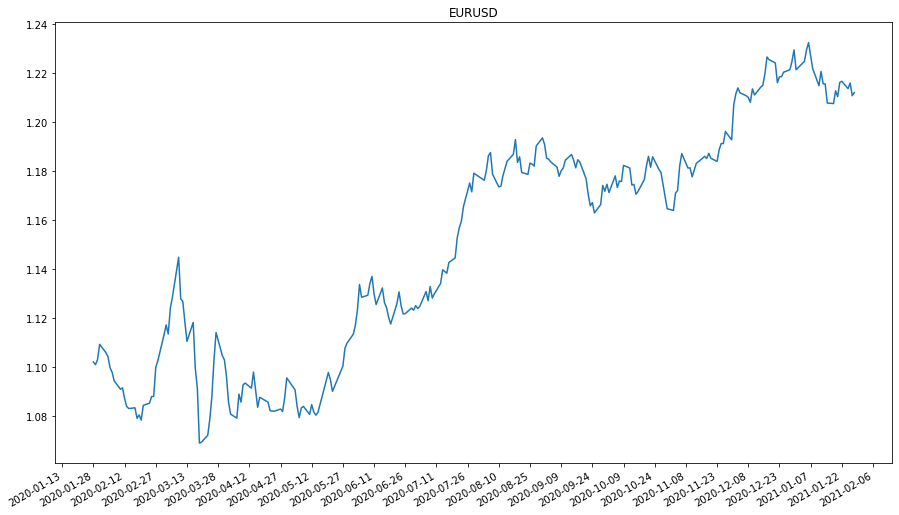

In [11]:
converted_dates = list(map(datetime.datetime.strptime, rf_fx.index, len( rf_fx.index)*['%Y-%m-%d']))
plt.figure(figsize=(15,9))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))
plt.gcf().autofmt_xdate()
plt.plot(converted_dates,  rf_fx.values)
plt.title("EURUSD")
plt.show()

In [12]:
lst=[]
for key,values in result.get('USDTRY').items():
    lst.append({"Date":key,"value":values})
rf_fx1=pd.DataFrame(lst).set_index('Date')

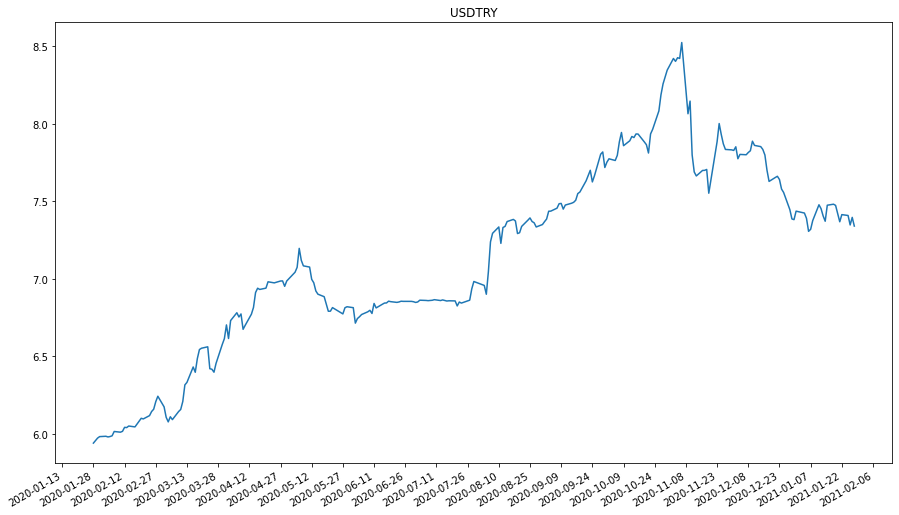

In [13]:
converted_dates = list(map(datetime.datetime.strptime, rf_fx1.index, len( rf_fx1.index)*['%Y-%m-%d']))
plt.figure(figsize=(15,9))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))
plt.gcf().autofmt_xdate()
plt.plot(converted_dates,  rf_fx1.values)
plt.title("USDTRY")
plt.show()